# Class Imbalance and Model Evaluation/Comparison

Agenda:
- Review class imbalance
- Review code for different ways to handle class imbalance
- Review model evalutation metrics
- Review how to compare models

In [15]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [16]:
# Read in data and split data to be used in the models
titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
PassengerId,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,1
2,1,1,38.0,1,0,71.2833,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,1


In [17]:
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

## Handling Class Imbalance

How do we know we have a class imbance problem???  We need to look at the target variable to see  if we have "even" groups.

### Visualizing Class Imbalance

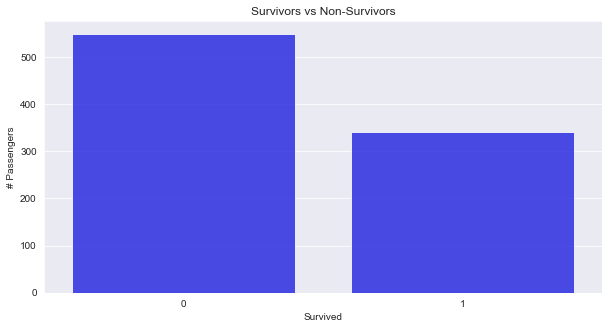

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(y, alpha=.80, color='blue')
plt.title('Survivors vs Non-Survivors')
plt.ylabel('# Passengers')
plt.show()

Based on the above bar chart do we have the the same number of survivors vs. non-survivors?  What will happen if we run a model with this data?

### Run a Dummy Classifier for Baseline Model

What is a baseline model?  Why do we use it?

Test Accuracy score:  0.6547085201793722
Test F1 score:  0.0


//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


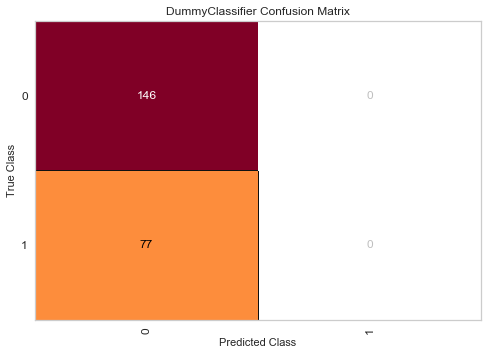

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent', random_state=13).fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)


# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, dummy_pred))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(dummy, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()


## Run a classification model with class imbalance

For the purpose of this example we are using a Logistic Regression classification mode but this will apply to other classification models. 

Test Accuracy score:  0.7847533632286996
Test F1 score:  0.6619718309859155


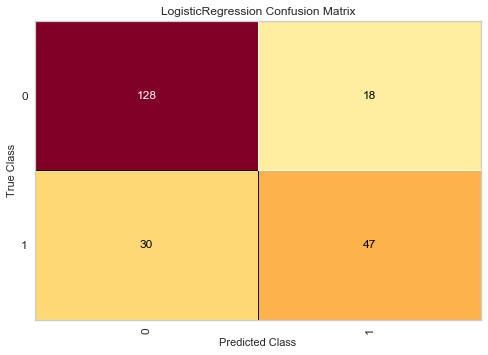

In [20]:
from sklearn.linear_model import LogisticRegression

# dt_clf = DecisionTreeClassifier(max_depth=5)
lr_clf = LogisticRegression(solver='liblinear', random_state=13)

# dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# y_pred_test = dt_clf.predict(X_test)
y_pred_test = lr_clf.predict(X_test)




# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, y_pred_test))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, y_pred_test))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(lr_clf, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

## Prepping data for handling class imbalances

We are goign to change the training dataset to which we fit our model, so we want to bring our training data back together before we make those changes. 

In [21]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [22]:
# separate minority and majority classes
deceased = training[training.Survived==0]
survived = training[training.Survived==1]

In [23]:
print('deceased count: '+ str(len(deceased)))
print('survived count: '+ str(len(survived)))

deceased count: 403
survived count: 263


In [24]:
from sklearn.utils import resample


![alt text](class_imb_images/resampling.png)

## Upsampling

In [25]:
# upsample minority
survived_upsampled = resample(survived,
                          replace=True, # sample with replacement
                          n_samples=len(deceased), # match number in majority class
                          random_state=23) # reproducible results

In [26]:
# combine majority and upsampled minority
upsampled = pd.concat([deceased, survived_upsampled])

# check new class counts
upsampled.Survived.value_counts()

1    403
0    403
Name: Survived, dtype: int64

Test Accuracy score:  0.7713004484304933
Test F1 score:  0.6577181208053691


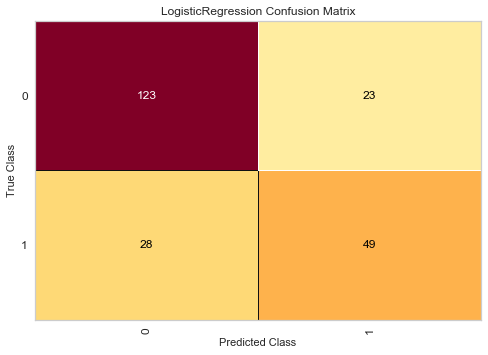

In [27]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Survived
X_train = upsampled.drop('Survived', axis=1)


# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')


# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)


# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

#checking confusion matrix
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(upsampled_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

## Downsampling

In [28]:

# downsample majority
survived_downsampled = resample(deceased,
                                replace = False, # sample without replacement
                                n_samples = len(survived), # match minority n
                                random_state = 23) # reproducible results




In [29]:
# combine minority and downsampled majority
downsampled = pd.concat([survived_downsampled, survived])

# checking counts
downsampled.Survived.value_counts()

1    263
0    263
Name: Survived, dtype: int64

Test Accuracy score:  0.7802690582959642
Test F1 score:  0.6711409395973155


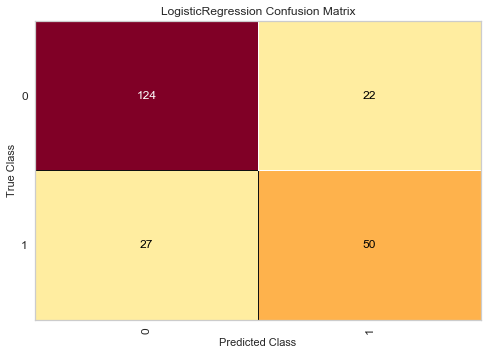

In [30]:
# trying logistic regression again with the balanced dataset
y_train = downsampled.Survived
X_train = downsampled.drop('Survived', axis=1)


# downsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')


# downsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)


# downsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred))

#checking confusion matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(downsampled_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

## Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

![alt text](class_imb_images/smote.png)

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

sm = SMOTE(random_state=23, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

Test Accuracy score:  0.7847533632286996
Test F1 score:  0.68


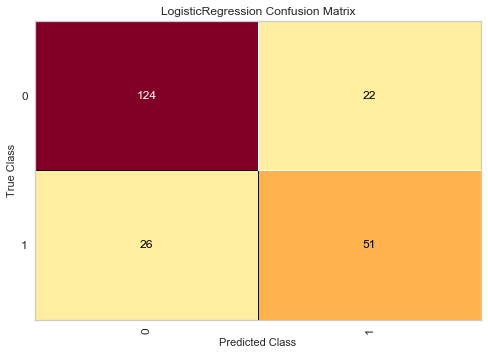

In [36]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(smote_lr, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

## Cross Validation

In [40]:
# Reading in the data... again

titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

In [41]:
# Create matrix of features... again
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [42]:
# setting up testing and training sets... again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
from sklearn.preprocessing import StandardScaler

feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 300, random_state = 0)

In [48]:
from sklearn.model_selection import cross_val_score

all_accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)


In [49]:
print(all_accuracies)

[0.85294118 0.85294118 0.80882353 0.77272727 0.78787879 0.81818182
 0.87878788 0.81818182 0.83333333 0.84848485]


## Bringing it all together

In [56]:
from sklearn.model_selection import cross_validate

all_scores = cross_validate(estimator = rf_classifier, X = X_train, y = y_train, 
                            cv = 10, n_jobs = -1, scoring = ['accuracy', 'f1', 'recall', 'precision'])

In [57]:
all_scores

{'fit_time': array([0.32545114, 0.32095504, 0.32833385, 0.32107925, 0.34290791,
        0.32908106, 0.33301091, 0.34138584, 0.21440792, 0.20806599]),
 'score_time': array([0.11139774, 0.10996604, 0.11098909, 0.11124372, 0.10110712,
        0.10580826, 0.09859324, 0.08287382, 0.05710506, 0.05774117]),
 'test_accuracy': array([0.85294118, 0.85294118, 0.80882353, 0.77272727, 0.78787879,
        0.81818182, 0.87878788, 0.81818182, 0.83333333, 0.84848485]),
 'test_f1': array([0.80769231, 0.80769231, 0.76363636, 0.70588235, 0.74074074,
        0.76923077, 0.84      , 0.77777778, 0.7755102 , 0.81481481]),
 'test_recall': array([0.77777778, 0.77777778, 0.77777778, 0.69230769, 0.76923077,
        0.76923077, 0.80769231, 0.80769231, 0.73076923, 0.84615385]),
 'test_precision': array([0.84      , 0.84      , 0.75      , 0.72      , 0.71428571,
        0.76923077, 0.875     , 0.75      , 0.82608696, 0.78571429])}